In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [157]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [158]:
# Deleting unuseful columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [159]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [160]:
# Removing outliers from age
q1 = df['Age'].quantile(.25)
q3 = df['Age'].quantile(.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [161]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [164]:
df.shape

(9641, 11)

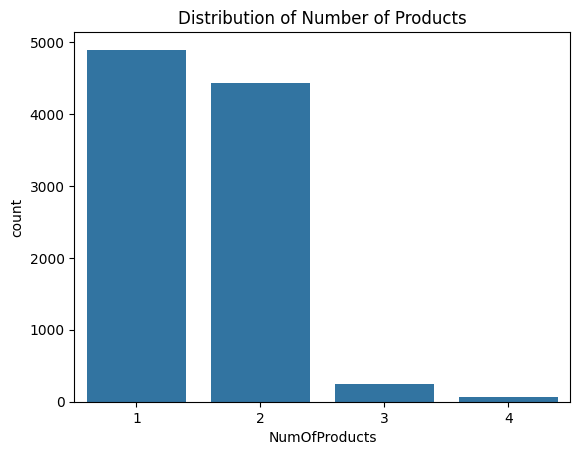

In [165]:
# Checking the distribution of number of products
sns.countplot(x=df['NumOfProducts'],data=df)
plt.title('Distribution of Number of Products')
plt.show()


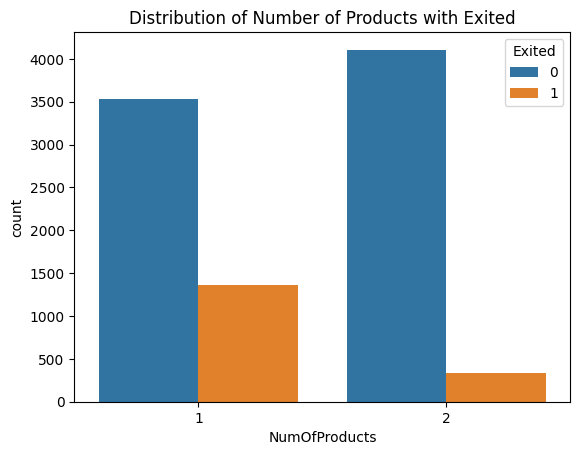

In [166]:
# checking attrition rate for those who have 1,2 products
one_two_products = df[df['NumOfProducts'].isin([1,2])]
sns.countplot(x=one_two_products['NumOfProducts'],hue=one_two_products['Exited'])
plt.title('Distribution of Number of Products with Exited')
plt.show()

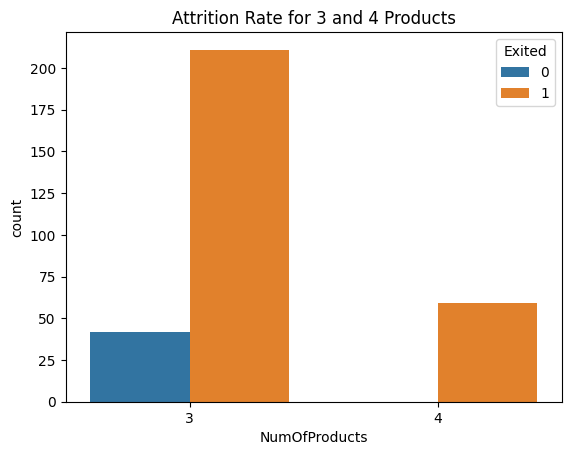

In [167]:
# checking attrition rate for those who have 3,4 products
three_four_products = df[df['NumOfProducts'].isin([3,4])]
sns.countplot(x=three_four_products['NumOfProducts'],hue=three_four_products['Exited'])
plt.title('Attrition Rate for 3 and 4 Products')
plt.show()

In [168]:
# people with higher number of products are more likely to leave the bank.

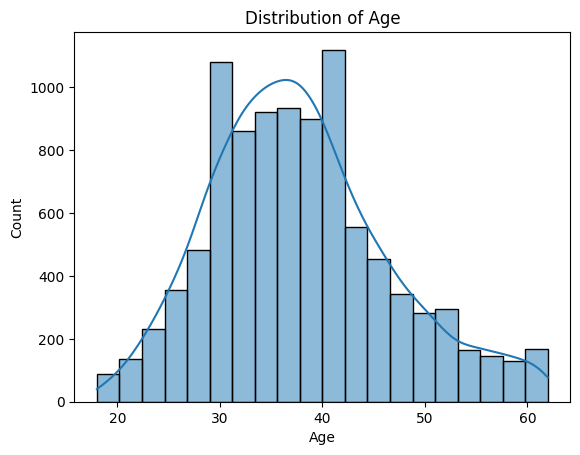

In [169]:
# Checking the distribution of age
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Distribution of Age')
plt.show()

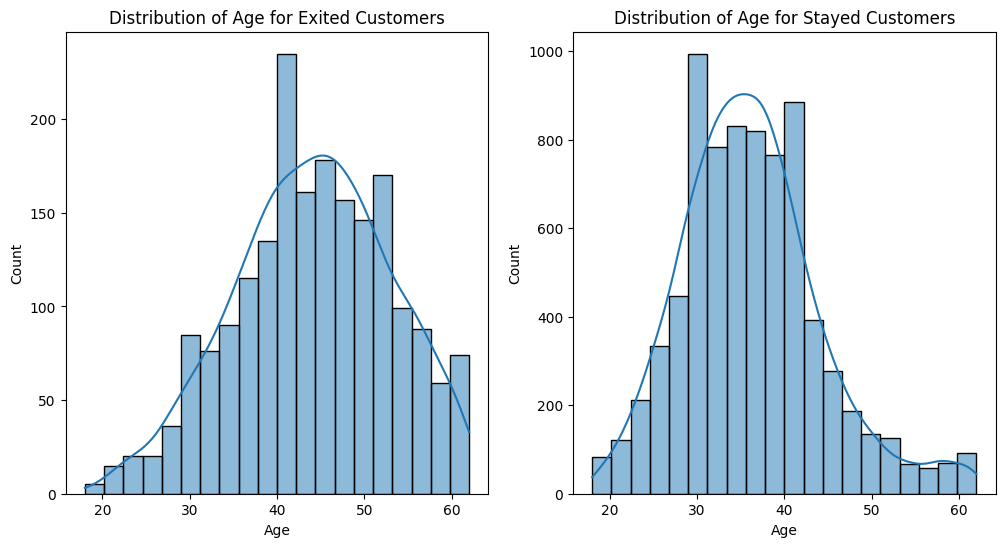

In [170]:
# checking age with respect to exited
people_exited = df[df['Exited'] == 1]
people_stayed = df[df['Exited'] == 0]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(people_exited['Age'],bins=20,kde=True)
plt.title('Distribution of Age for Exited Customers')
plt.subplot(1,2,2)
sns.histplot(people_stayed['Age'],bins=20,kde=True)
plt.title('Distribution of Age for Stayed Customers')
plt.show()

In [171]:
# people with 25-45 years of age are more likely to stay in the bank.
# people with 35-55 years of age are more likely to leave the bank.
# people with 35-45 years of age are leabing and exting the bank most

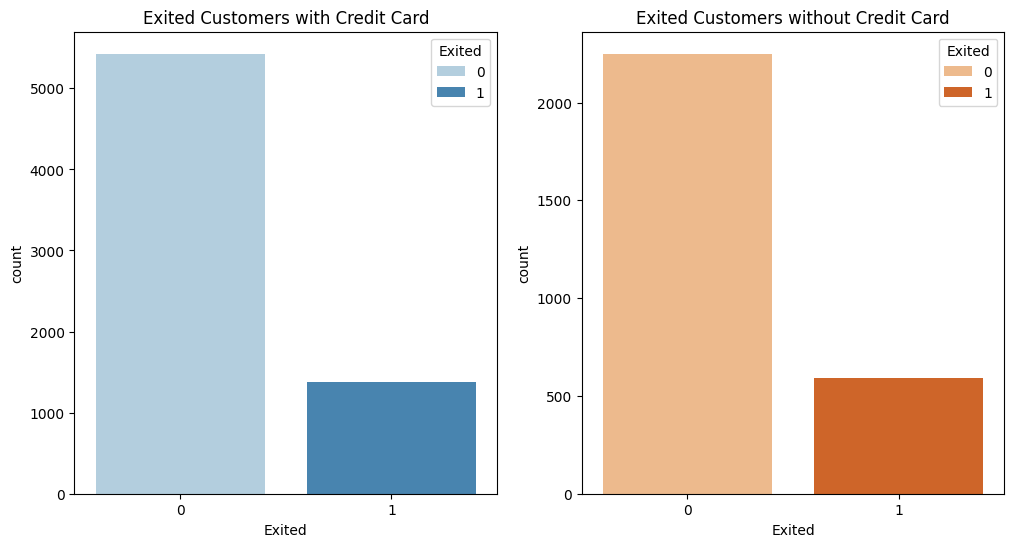

In [172]:
# checing does credits card have any effect on the attrition rate
with_credit_card = df[df['HasCrCard'] == 1]
without_credit_card = df[df['HasCrCard'] == 0]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=with_credit_card['Exited'],palette='Blues',hue=with_credit_card['Exited'])
plt.title('Exited Customers with Credit Card')
plt.subplot(1,2,2)
sns.countplot(x=without_credit_card['Exited'],palette='Oranges',hue=without_credit_card['Exited'])
plt.title('Exited Customers without Credit Card')
plt.show()



In [173]:
# coudnt find any correlation between credit card and attrition rate



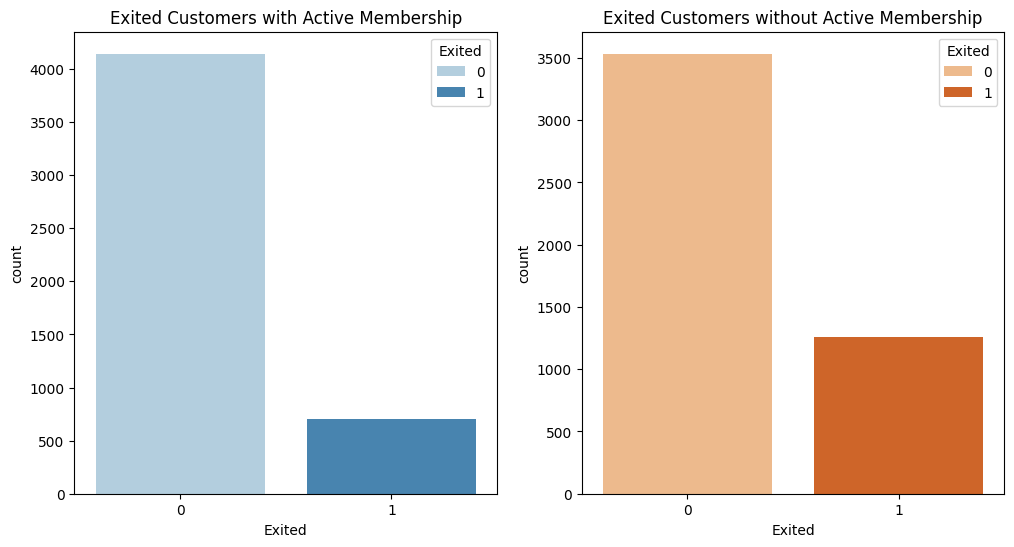

In [174]:
# checking active member ship effect on attrition rate
with_active_membership = df[df['IsActiveMember'] == 1]
without_active_membership = df[df['IsActiveMember'] == 0]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x=with_active_membership['Exited'],palette='Blues',hue=with_active_membership['Exited'])
plt.title('Exited Customers with Active Membership')
plt.subplot(1,2,2)
sns.countplot(x=without_active_membership['Exited'],palette='Oranges',hue=without_active_membership['Exited'])
plt.title('Exited Customers without Active Membership')
plt.show()


In [175]:
# coudnt find any correlation between credit card and attrition rate

In [176]:
# remove outliers from salary
q1 = df['EstimatedSalary'].quantile(.25)
q3 = df['EstimatedSalary'].quantile(.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['EstimatedSalary'] >= lower_bound) & (df['EstimatedSalary'] <= upper_bound)]



In [177]:
df['EstimatedSalary'].describe()

count      9641.000000
mean     100172.421223
std       57512.265414
min          11.580000
25%       51113.140000
50%      100324.010000
75%      149458.730000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [178]:
bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']

df['Salary_Group'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels)

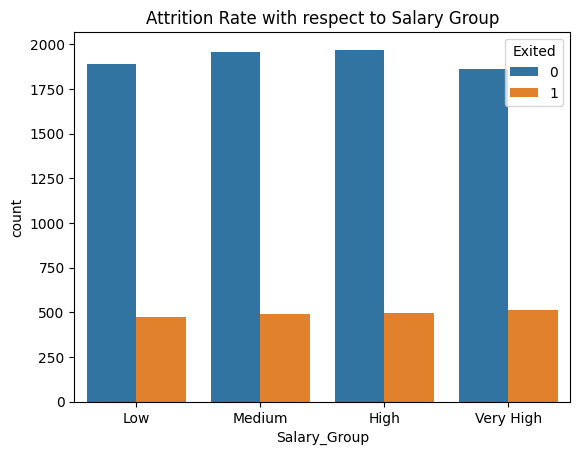

In [179]:
# checking attrition rate with respect to salary group
sns.countplot(x=df['Salary_Group'],hue=df['Exited'])
plt.title('Attrition Rate with respect to Salary Group')
plt.show()

<Figure size 800x600 with 0 Axes>

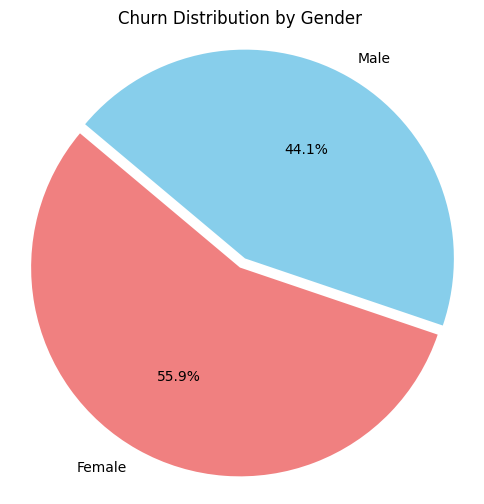

In [180]:
# cheking with pie chart with respect to gender with attrition rate
churned = df[df['Exited'] == 1]
churn_gender_counts = churned['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.figure(figsize=(6,6))
colors = ['lightcoral', 'skyblue']
explode = (0.05, 0)

plt.pie(churn_gender_counts, labels=churn_gender_counts.index,
        autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.title('Churn Distribution by Gender ')
plt.axis('equal')
plt.show()


<Figure size 800x600 with 0 Axes>

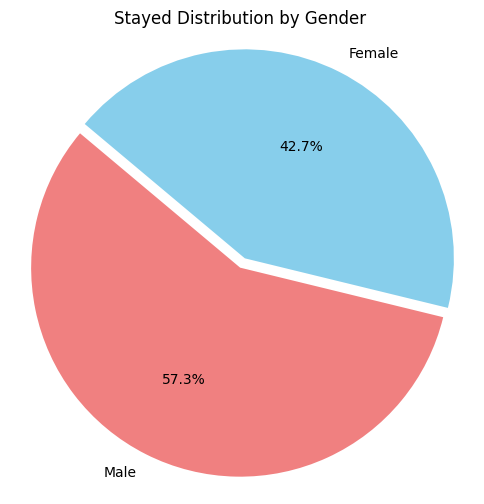

In [181]:
# cheking with pie chart with respect to gender with attrition rate
churned = df[df['Exited'] == 0]
churn_gender_counts = churned['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.figure(figsize=(6,6))
colors = ['lightcoral', 'skyblue']
explode = (0.05, 0)

plt.pie(churn_gender_counts, labels=churn_gender_counts.index,
        autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.title('Stayed Distribution by Gender ')
plt.axis('equal')
plt.show()


In [182]:
# Gender role is slightly matter in the attrition rate

In [183]:
df['Tenure'].value_counts().sort_index()


Tenure
0      397
1      992
2     1011
3      972
4      958
5      972
6      931
7     1000
8      998
9      939
10     471
Name: count, dtype: int64

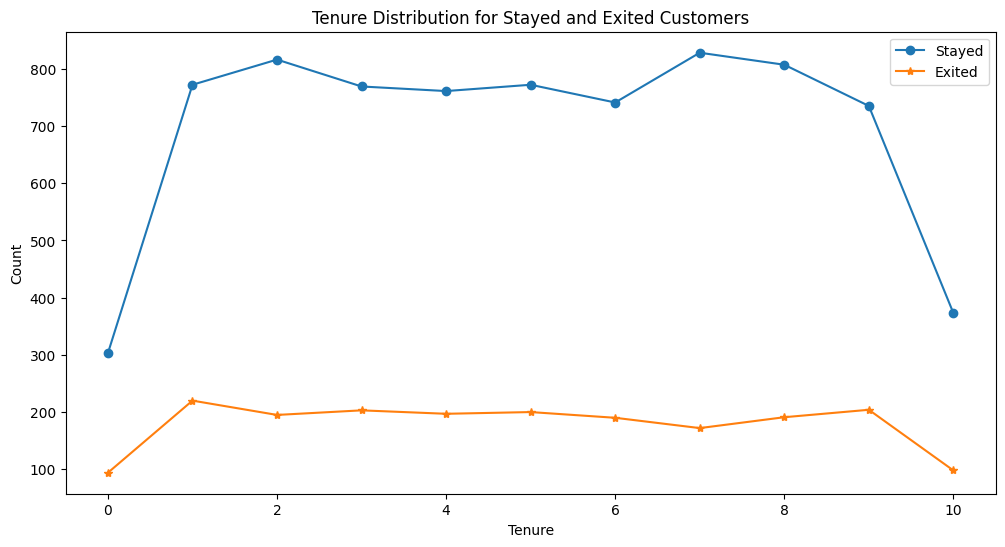

In [184]:
# creating line cahrt for tenure for stayed and exited customers
stayed_tenure = df[df['Exited'] == 0]['Tenure'].value_counts().sort_index()
exited_tenure = df[df['Exited'] == 1]['Tenure'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(stayed_tenure.index, stayed_tenure.values, label='Stayed', marker='o')
plt.plot(exited_tenure.index, exited_tenure.values, label='Exited', marker='*')
plt.title('Tenure Distribution for Stayed and Exited Customers')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend()
plt.show()



In [185]:
df['CreditScore'].describe()

count    9641.000000
mean      650.287626
std        96.691920
min       350.000000
25%       583.000000
50%       652.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

In [186]:
# Average credit score of churned customers

churned_avg_credit = df[df['Exited'] == 1]['CreditScore'].mean()
stayed_avg_credit = df[df['Exited'] == 0]['CreditScore'].mean()

print("Average Credit Score (Exited):", churned_avg_credit)
print("Average Credit Score (Stayed):", stayed_avg_credit)



Average Credit Score (Exited): 645.4215885947046
Average Credit Score (Stayed): 651.5324996743519


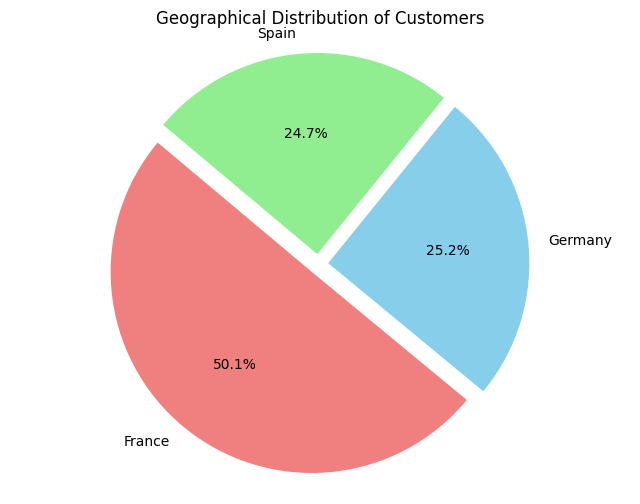

In [187]:
# creating pie chart for the geofraphical region
geographical_region = df['Geography'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['lightcoral', 'skyblue', 'lightgreen']
explode = (0.05, 0.05, 0.05)
plt.pie(geographical_region, labels=geographical_region.index,
        autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Geographical Distribution of Customers')
plt.axis('equal')
plt.show()

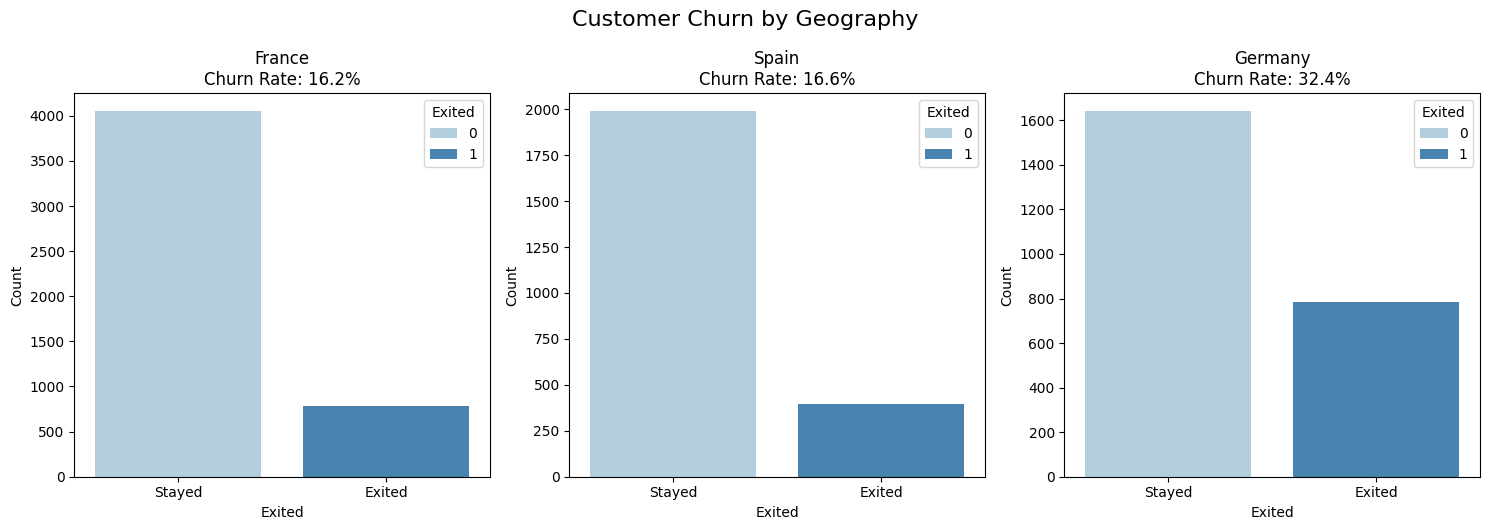

In [188]:
# most poeple are from France , so lets check every region with respect to attrition rate
regions = df['Geography'].unique()
num_regions = len(regions)

plt.figure(figsize=(15, 5))

for i, region in enumerate(regions, 1):
    region_data = df[df['Geography'] == region]
    
    total = len(region_data)
    churn_percent = region_data['Exited'].mean() * 100 
    
    plt.subplot(1, num_regions, i)
    sns.countplot(data=region_data, x='Exited', palette='Blues', hue='Exited')
    plt.title(f"{region}\nChurn Rate: {churn_percent:.1f}%", fontsize=12)
    plt.xlabel('Exited')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Stayed', 'Exited'])

plt.tight_layout()
plt.suptitle('Customer Churn by Geography', fontsize=16, y=1.05)
plt.show()


In [189]:
# Checking does blance have any effect on the attrition rate
df['Balance'].describe()

count      9641.000000
mean      76560.672538
std       62401.698405
min           0.000000
25%           0.000000
50%       97318.250000
75%      127660.460000
max      250898.090000
Name: Balance, dtype: float64

In [190]:
when_blance_zero = df[df['Balance'] == 0]
when_blance_zero['Exited'].value_counts()

Exited
0    2998
1     485
Name: count, dtype: int64

In [191]:
when_blance_above_75 = df[df['Balance'] > df['Balance'].quantile(0.75)]
when_blance_above_75['Exited'].value_counts()

Exited
0    1842
1     568
Name: count, dtype: int64

In [192]:
avg_balance_when_exited = df[df['Exited'] == 1]['Balance'].mean()
avg_balance_when_stayed = df[df['Exited'] == 0]['Balance'].mean()
print("Average Balance (Exited):", avg_balance_when_exited)
print("Average Balance (Stayed):", avg_balance_when_stayed)

Average Balance (Exited): 90986.17805498981
Average Balance (Stayed): 72870.20844600756


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9641 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9641 non-null   int64   
 1   Geography        9641 non-null   object  
 2   Gender           9641 non-null   object  
 3   Age              9641 non-null   int64   
 4   Tenure           9641 non-null   int64   
 5   Balance          9641 non-null   float64 
 6   NumOfProducts    9641 non-null   int64   
 7   HasCrCard        9641 non-null   int64   
 8   IsActiveMember   9641 non-null   int64   
 9   EstimatedSalary  9641 non-null   float64 
 10  Exited           9641 non-null   int64   
 11  Salary_Group     9641 non-null   category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 913.5+ KB


In [194]:
df.drop(columns=['Salary_Group'],inplace=True)

# Model Build

In [195]:
# onehot encoding 
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [196]:
df = df.astype(int)  

In [197]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9641 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CreditScore        9641 non-null   int64
 1   Age                9641 non-null   int64
 2   Tenure             9641 non-null   int64
 3   Balance            9641 non-null   int64
 4   NumOfProducts      9641 non-null   int64
 5   HasCrCard          9641 non-null   int64
 6   IsActiveMember     9641 non-null   int64
 7   EstimatedSalary    9641 non-null   int64
 8   Exited             9641 non-null   int64
 9   Geography_Germany  9641 non-null   int64
 10  Geography_Spain    9641 non-null   int64
 11  Gender_Male        9641 non-null   int64
dtypes: int64(12)
memory usage: 979.2 KB


In [199]:
# split date for train and Text
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [200]:
feature_columns = X.columns

In [201]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          SVC(),
          KNeighborsClassifier(),
          GaussianNB()]

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model.__class__.__name__}")
    print('--'*50)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    print('--'*50)

Model: LogisticRegression
----------------------------------------------------------------------------------------------------
Accuracy: 0.8149300155520995
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1523
           1       0.65      0.26      0.37       406

    accuracy                           0.81      1929
   macro avg       0.74      0.61      0.63      1929
weighted avg       0.79      0.81      0.78      1929

[[1465   58]
 [ 299  107]]


----------------------------------------------------------------------------------------------------
Model: DecisionTreeClassifier
----------------------------------------------------------------------------------------------------
Accuracy: 0.7734577501296008
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1523
           1       0.46      0.49      0.47       406

    accuracy                           0.77      1929
   macro 

In [203]:
parameters = {
    'learning_rate': np.logspace(-3, 0, 10),  
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': np.arange(3, 15),        
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11), 
    'subsample': np.linspace(0.5, 1.0, 6),   
    'max_features': ['sqrt', 'log2', None] 
}
gb_random = RandomizedSearchCV(
    GradientBoostingClassifier(),
    parameters,
    n_iter=100,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
gb_random.fit(X_train_scaled, y_train)
best_params = gb_random.best_params_
best_score = gb_random.best_score_
best_gb_model = gb_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [204]:
best_score

0.8670913879795646

In [205]:
def predicting(data, scaler, model, feature_columns):
    data = pd.get_dummies(data, drop_first=True)
    for col in feature_columns:
        if col not in data.columns:
            data[col] = 0
    data = data[feature_columns]
    data = scaler.transform(data)
    prediction = model.predict(data)
    return "Customer will leave the bank" if prediction[0] == 1 else "Customer will stay in the bank"


In [206]:
new_customer = pd.DataFrame({
    'CreditScore': [600],
    'Age': [40],
    'Tenure': [3],
    'Balance': [4678],
    'NumOfProducts': [4],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000],
    'Gender': ['Female'],
    'Geography': ['Germany']
})

result = predicting(new_customer, scaler, best_gb_model, feature_columns)
print(result)


Customer will leave the bank


In [207]:
feature_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [208]:
import pickle
model = {
    'model': best_gb_model,
    'scaler': scaler,
    'feature_columns': feature_columns
}
with open('churn_model.pkl', 'wb') as f:
    pickle.dump(model, f)